In [96]:
import keras.utils as ku; import keras.models as km; import keras.layers as kl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [11]:
INPUT_DIR = './data/'

Import data, convert to np arrays

In [164]:
df_train = pd.read_csv( INPUT_DIR + 'train.csv')
df_test = pd.read_csv( INPUT_DIR + 'test.csv')
print(df_train.columns)

# dropping certain features
features2drop = ['PassengerId','Ticket','Name','Embarked','Cabin']

df_train = df_train.drop( columns = features2drop ); df_test = df_test.drop( columns = features2drop )

mapping_gender = {'male': 1, 'female': 0}
mapping_nan = { np.nan : 0 }

df_train = df_train.replace({'Sex': mapping_gender, 'Age': mapping_nan, 'Fare' : mapping_nan}).convert_objects(); df_test = df_test.replace({'Sex': mapping_gender, 'Age': mapping_age, 'Fare' : mapping_nan}).convert_objects()

list_features = list(df_train.columns)
list_features.remove('Survived')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


/home/jbrothschild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


In [165]:
x_train, x_validate, y_train, y_validate = train_test_split(df_train.as_matrix( columns = list_features), df_train.as_matrix(columns = ['Survived']), test_size=0.25)

x_test = df_test.as_matrix(columns = list_features)

/home/jbrothschild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/jbrothschild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(418, 6)

Neural Network

In [167]:
num_nodes = 10

input_data = kl.Input(shape = (np.shape(x_train)[1],), name='input')

x = kl.Dense(num_nodes, name = 'hidden'+str(1), activation = 'relu')(input_data)

x = kl.Dense(num_nodes, name = 'hidden'+str(2), activation = 'relu')(x)

output = kl.Dense(1, name='output', activation='sigmoid')(x)

model = km.Model(inputs = input_data, outputs = output)

model.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = 'binary_crossentropy')

In [168]:
fit = model.fit(x_train, y_train, epochs = 100, batch_size = 64, verbose=1)

Epoch 1/100
668/668 [==============================] - 2s 3ms/step - loss: 1.0238 - acc: 0.5434
Epoch 2/100
668/668 [==============================] - 0s 71us/step - loss: 0.6525 - acc: 0.6587
Epoch 3/100
668/668 [==============================] - 0s 65us/step - loss: 0.7632 - acc: 0.5898
Epoch 4/100
668/668 [==============================] - 0s 69us/step - loss: 0.6317 - acc: 0.6542
Epoch 5/100
668/668 [==============================] - 0s 69us/step - loss: 0.6296 - acc: 0.6766
Epoch 6/100
668/668 [==============================] - 0s 74us/step - loss: 0.6540 - acc: 0.6392
Epoch 7/100
668/668 [==============================] - 0s 72us/step - loss: 0.6264 - acc: 0.6751
Epoch 8/100
668/668 [==============================] - 0s 69us/step - loss: 0.6423 - acc: 0.6587
Epoch 9/100
668/668 [==============================] - 0s 74us/step - loss: 0.6777 - acc: 0.6138
Epoch 10/100
668/668 [==============================] - 0s 75us/step - loss: 0.6408 - acc: 0.6347
Epoch 11/100
668/668 [========

668/668 [==============================] - 0s 68us/step - loss: 0.5917 - acc: 0.6946
Epoch 85/100
668/668 [==============================] - 0s 87us/step - loss: 0.5909 - acc: 0.6886
Epoch 86/100
668/668 [==============================] - 0s 70us/step - loss: 0.5873 - acc: 0.6781
Epoch 87/100
668/668 [==============================] - 0s 70us/step - loss: 0.5906 - acc: 0.6931
Epoch 88/100
668/668 [==============================] - 0s 74us/step - loss: 0.5961 - acc: 0.6811
Epoch 89/100
668/668 [==============================] - 0s 71us/step - loss: 0.5884 - acc: 0.7021
Epoch 90/100
668/668 [==============================] - 0s 70us/step - loss: 0.6150 - acc: 0.6751
Epoch 91/100
668/668 [==============================] - 0s 74us/step - loss: 0.5868 - acc: 0.6826
Epoch 92/100
668/668 [==============================] - 0s 82us/step - loss: 0.5872 - acc: 0.6841
Epoch 93/100
668/668 [==============================] - 0s 75us/step - loss: 0.5943 - acc: 0.6781
Epoch 94/100
668/668 [===========

Text(0, 0.5, 'Accuracy')

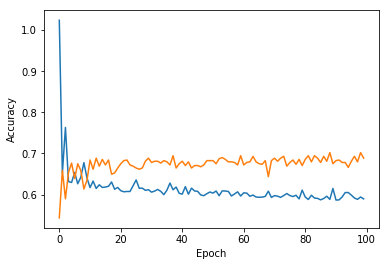

In [169]:
plt.plot(fit.history['loss'])
plt.xlabel('Epoch'); plt.ylabel('Error Loss')

plt.plot(fit.history['acc'])
plt.xlabel('Epoch'); plt.ylabel('Accuracy')


In [170]:
score = model.evaluate(x_validate, y_validate)
print( "The validation score is " + str(score) )

223/223 [==============================] - 0s 2ms/step
The validation score is [0.6316616540532476, 0.6681614365812909]


Now we need to set a threshold above which predictions are 1, and below which predictions are 0.

Text(0, 0.5, 'Frequency')

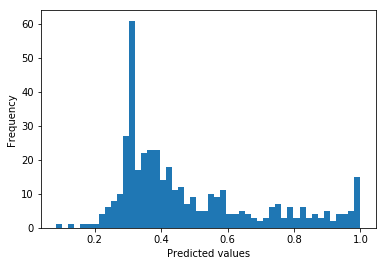

In [171]:
y_test = model.predict(x_test)
plt.hist(y_test, bins=50)
plt.xlabel('Predicted values'); plt.ylabel('Frequency')

In [177]:
threshold = 0.56 # from the graph above. Can vary
y_test[ y_test > threshold] = int(1); y_test[ y_test <= threshold] = int(0)
df_test_raw = pd.read_csv( INPUT_DIR + 'test.csv')
df_y_test = pd.DataFrame({'PassengerId' : df_test_raw.as_matrix(columns=['PassengerId'])[:,0],'Survived' : y_test[:,0].astype(int)})
df_y_test.to_csv('survival_predictions.csv', index = False)

/home/jbrothschild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
